In [1]:
import glob
import os
import json

import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd
import cPickle as pkl


from pipeline.python.classifications import experiment_classes as util


import scipy.stats as spstats

from pipeline.python.utils import label_figure, natural_keys
from pipeline.python.classifications import bootstrap_fit_tuning_curves as osi
from pipeline.python.classifications import get_dataset_stats as gd

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/applica

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/rois/utils.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in la

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/retinotopy/target_visual_field.py:19: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application

In [2]:
%matplotlib notebook

# Get dataset info

In [3]:
options = ['-t', 'traces001']

optsE = gd.extract_options(options)


rootdir = optsE.rootdir
aggregate_dir = optsE.aggregate_dir
fov_type = optsE.fov_type
traceid = optsE.traceid
state  = optsE.state
response_type = optsE.response_type
print response_type
print aggregate_dir

dff
/n/coxfs01/julianarhee/aggregate-visual-areas


In [4]:
sdata = gd.get_dataset_info(aggregate_dir=aggregate_dir, traceid=traceid,
                           fov_type=fov_type, state=state)

In [5]:
sdata.head()

,animalid,experiment,fov,session,visual_area,exp_no,animal_no
0,JC084,rfs,FOV1_zoom2p0x,20190522,V1,3,4
1,JC084,gratings,FOV1_zoom2p0x,20190522,V1,1,4
2,JC084,blobs,FOV1_zoom2p0x,20190522,V1,0,4
3,JC084,retino,FOV1_zoom2p0x,20190522,V1,2,4
4,JC084,rfs,FOV1_zoom2p0x,20190525,Lm,3,4


#### Look at 1 session first

In [8]:
animalid = 'JC084'
session = '20190522'


In [9]:
responsive_test = 'nstds'
responsive_thr = 10
n_stds = 2.5

stats_desc = util.get_stats_desc(traceid=traceid, responsive_test=responsive_test, 
                    responsive_thr=responsive_thr, n_stds=n_stds)

In [445]:
reload(util)

<module 'pipeline.python.classifications.experiment_classes' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py'>

In [11]:
animalid = 'JC084'
session = '20190522'
fov = 'FOV1_zoom2p0x'
experiment = 'gratings'

In [91]:

S = util.Session(animalid, session, fov)

roi_list = S.get_all_responsive_cells(traceid=traceid, response_type=response_type,
                                  responsive_test=responsive_test, responsive_thr=responsive_thr, fit_thr=0.5)



[JC084] 20190522 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
... [JC084|20190522|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
... renaming experiment to run name: combined_rfs_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC084|20190522|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... getting responsive cells (test: nstds, thr: 10.00')
traces001
... [JC084|20190522|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
--> [retino] not implemented


In [92]:


roi_list, nrois_total = S.experiments[experiment].get_responsive_cells(responsive_test=responsive_test, 
                                                responsive_thr=responsive_thr, 
                                                n_stds=n_stds)

stats = S.experiments[experiment].get_trial_metrics() #ex.get_trial_metrics()
tstats = stats[roi_list]

... getting responsive cells (test: nstds, thr: 10.00')
... loading data array
... offset: 644.22
... adjusting for equal reps / condn...


In [93]:
len(roi_list)

127

In [94]:
labels = S.experiments[experiment].data.labels
labels.head()

trial_refix = dict((trial, i) for i, trial in enumerate(sorted(labels['trial'].unique(), key=natural_keys)))

cfgs = []
for config, g in labels.groupby(['config']):
    trial_ixs = np.array([trial_refix[trial] for trial in sorted(g['trial'].unique(), key=natural_keys)])
    curr_trials = tstats.loc[trial_ixs]
    assert len(np.where(np.isnan(curr_trials))[0]) == 0
    cfgs.append( pd.Series(data=curr_trials.mean(axis=0), name=config) )
    
configdf = pd.DataFrame(cfgs)
    

,nframes_on,stim_on_frame,config,stim_dur,trial,tsec
0,22,22,config024,0.5,trial00001,-0.492724
1,22,22,config024,0.5,trial00001,-0.470327
2,22,22,config024,0.5,trial00001,-0.447931
3,22,22,config024,0.5,trial00001,-0.425534
4,22,22,config024,0.5,trial00001,-0.403138


In [98]:
configdf.shape

(64, 127)

<IPython.core.display.Javascript object>


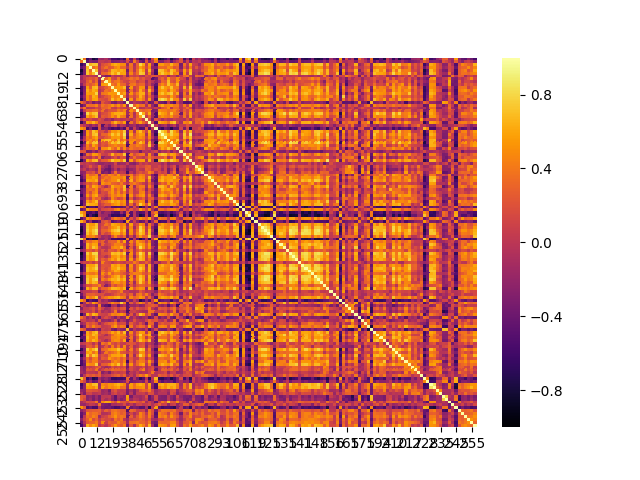

In [99]:
corr = configdf.corr()
pl.figure()
sns.heatmap(corr, cmap='inferno', vmin=-1, vmax=1)

In [68]:
corr.shape

(207, 207)

# Get position info

In [100]:
from scipy.spatial.distance import pdist, squareform


In [101]:
pos_fpath = glob.glob(os.path.join(aggregate_dir, 'roi_positions.pkl'))[0]
with open(pos_fpath, 'rb') as f:
    fovinfo = pkl.load(f)
    
fovinfo.keys()

['positions', 'ap_lim', 'ml_lim', 'dims']

In [102]:
posdf = fovinfo['positions']

In [103]:
posdf.head()

,index,ap_pos,ml_pos,visual_area,animalid,session,fov
0,0,134.358419,961.493918,Li,JC076,20190422,FOV1_zoom2p0x
1,1,71.812258,938.601205,Li,JC076,20190422,FOV1_zoom2p0x
2,2,60.229636,930.970301,Li,JC076,20190422,FOV1_zoom2p0x
3,3,141.307992,938.601205,Li,JC076,20190422,FOV1_zoom2p0x
4,4,213.120250,944.324384,Li,JC076,20190422,FOV1_zoom2p0x


In [104]:
currpos = posdf.groupby(['animalid', 'session', 'fov']).get_group((animalid, session, fov))
currpos = currpos[currpos['index'].isin(roi_list)]
currpos.index = currpos['index']
_ =currpos.pop('index')
currpos = currpos[['ap_pos', 'ml_pos']]
pwdists = pdist(currpos[['ml_pos', 'ap_pos']], metric='euclidean')

### Double-check FOV position

<IPython.core.display.Javascript object>


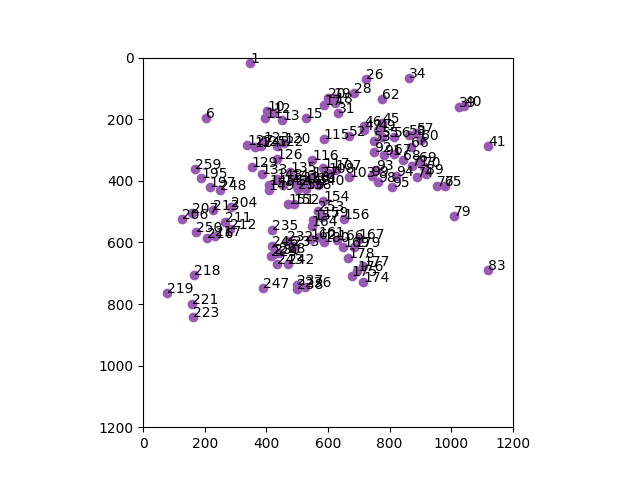

In [105]:
fig, ax = pl.subplots() #pl.figure()
ax.scatter(currpos['ap_pos'], currpos['ml_pos'])
for i in roi_list:
    xc = currpos['ap_pos'][i]
    yc = currpos['ml_pos'][i]
    ax.text(xc, yc, '%i' % int(i+1))
#ax.invert_yaxis()
ax.set_xlim([0, 1200])
ax.set_ylim([1200, 0])
ax.set_aspect('equal')

#### Look at pw distances

In [106]:
dist_matrix = squareform(pwdists)


In [107]:
len(pwdists)

8001

In [108]:
dist_matrix = pd.DataFrame(dist_matrix, index=roi_list, columns=roi_list)

<IPython.core.display.Javascript object>


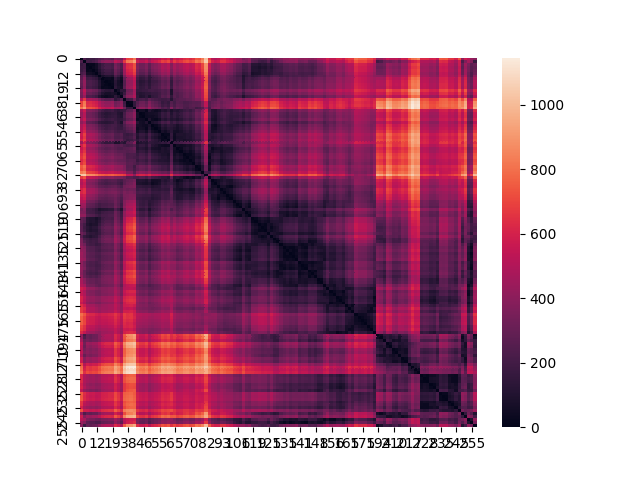

In [109]:
pl.figure()
sns.heatmap(dist_matrix)

In [82]:
ucorr = corr.where(np.triu(np.ones(corr.shape), 1).astype(np.bool))
ucorr = ucorr.stack().reset_index()
ucorr.shape
ucorr.columns = ['row', 'col', 'value']

In [110]:
posdf.head()

,index,ap_pos,ml_pos,visual_area,animalid,session,fov
0,0,134.358419,961.493918,Li,JC076,20190422,FOV1_zoom2p0x
1,1,71.812258,938.601205,Li,JC076,20190422,FOV1_zoom2p0x
2,2,60.229636,930.970301,Li,JC076,20190422,FOV1_zoom2p0x
3,3,141.307992,938.601205,Li,JC076,20190422,FOV1_zoom2p0x
4,4,213.120250,944.324384,Li,JC076,20190422,FOV1_zoom2p0x


In [111]:
roi = 0
currp = currpos.loc[roi]

currdists = (currpos[['ap_pos', 'ml_pos']] - np.array(currp)).pow(2).sum(1).pow(0.5)
len(currdists)

127

<IPython.core.display.Javascript object>


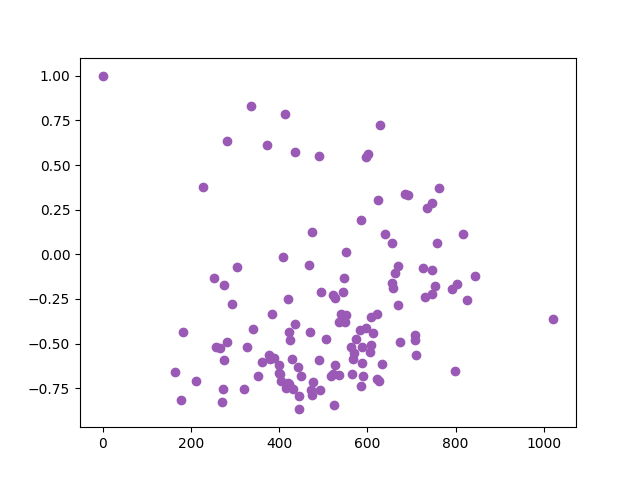

In [112]:
pl.figure()
pl.scatter(currdists, corr[0])

In [113]:
curr_dists

array([  151.80709054,   215.500546  ,   228.26592652,   210.89315649,
         156.58782586,   164.22303706,   182.12789719,   178.29715587,
         212.39119066,   251.89783738,   275.4539816 ,   304.66480223,
         293.47555174,   275.68069058,   294.81809478,   209.35890755,
         275.90394923,   332.49668127,   378.54067918,   352.80049638,
         351.92878717,   343.41685569,   320.78624979,   326.90407184,
         516.47522231,   570.78711467,   544.69224111,   743.07521812,
         690.99958764,   708.40133287,   816.95613287,   773.03749124,
         626.35326003,   470.66509869,   422.21963271,   429.73805391,
         468.22968767,   452.37653144,   399.55187906,   475.27138763,
         509.24348398,   490.43556112,   525.19694635,   585.54938708,
         566.5943188 ,   592.22296519,   608.77271933,   444.07589514,
         616.18128342,   650.25370484,   587.41249916,   552.52001621,
         586.20833931,   632.75618291,   657.43578306,   622.8776158 ,
      

In [114]:
print len(roi_list)
print np.sqrt(len(roi_list))

127
11.2694276696


In [115]:
corr = configdf.corr(method='pearson')


<IPython.core.display.Javascript object>


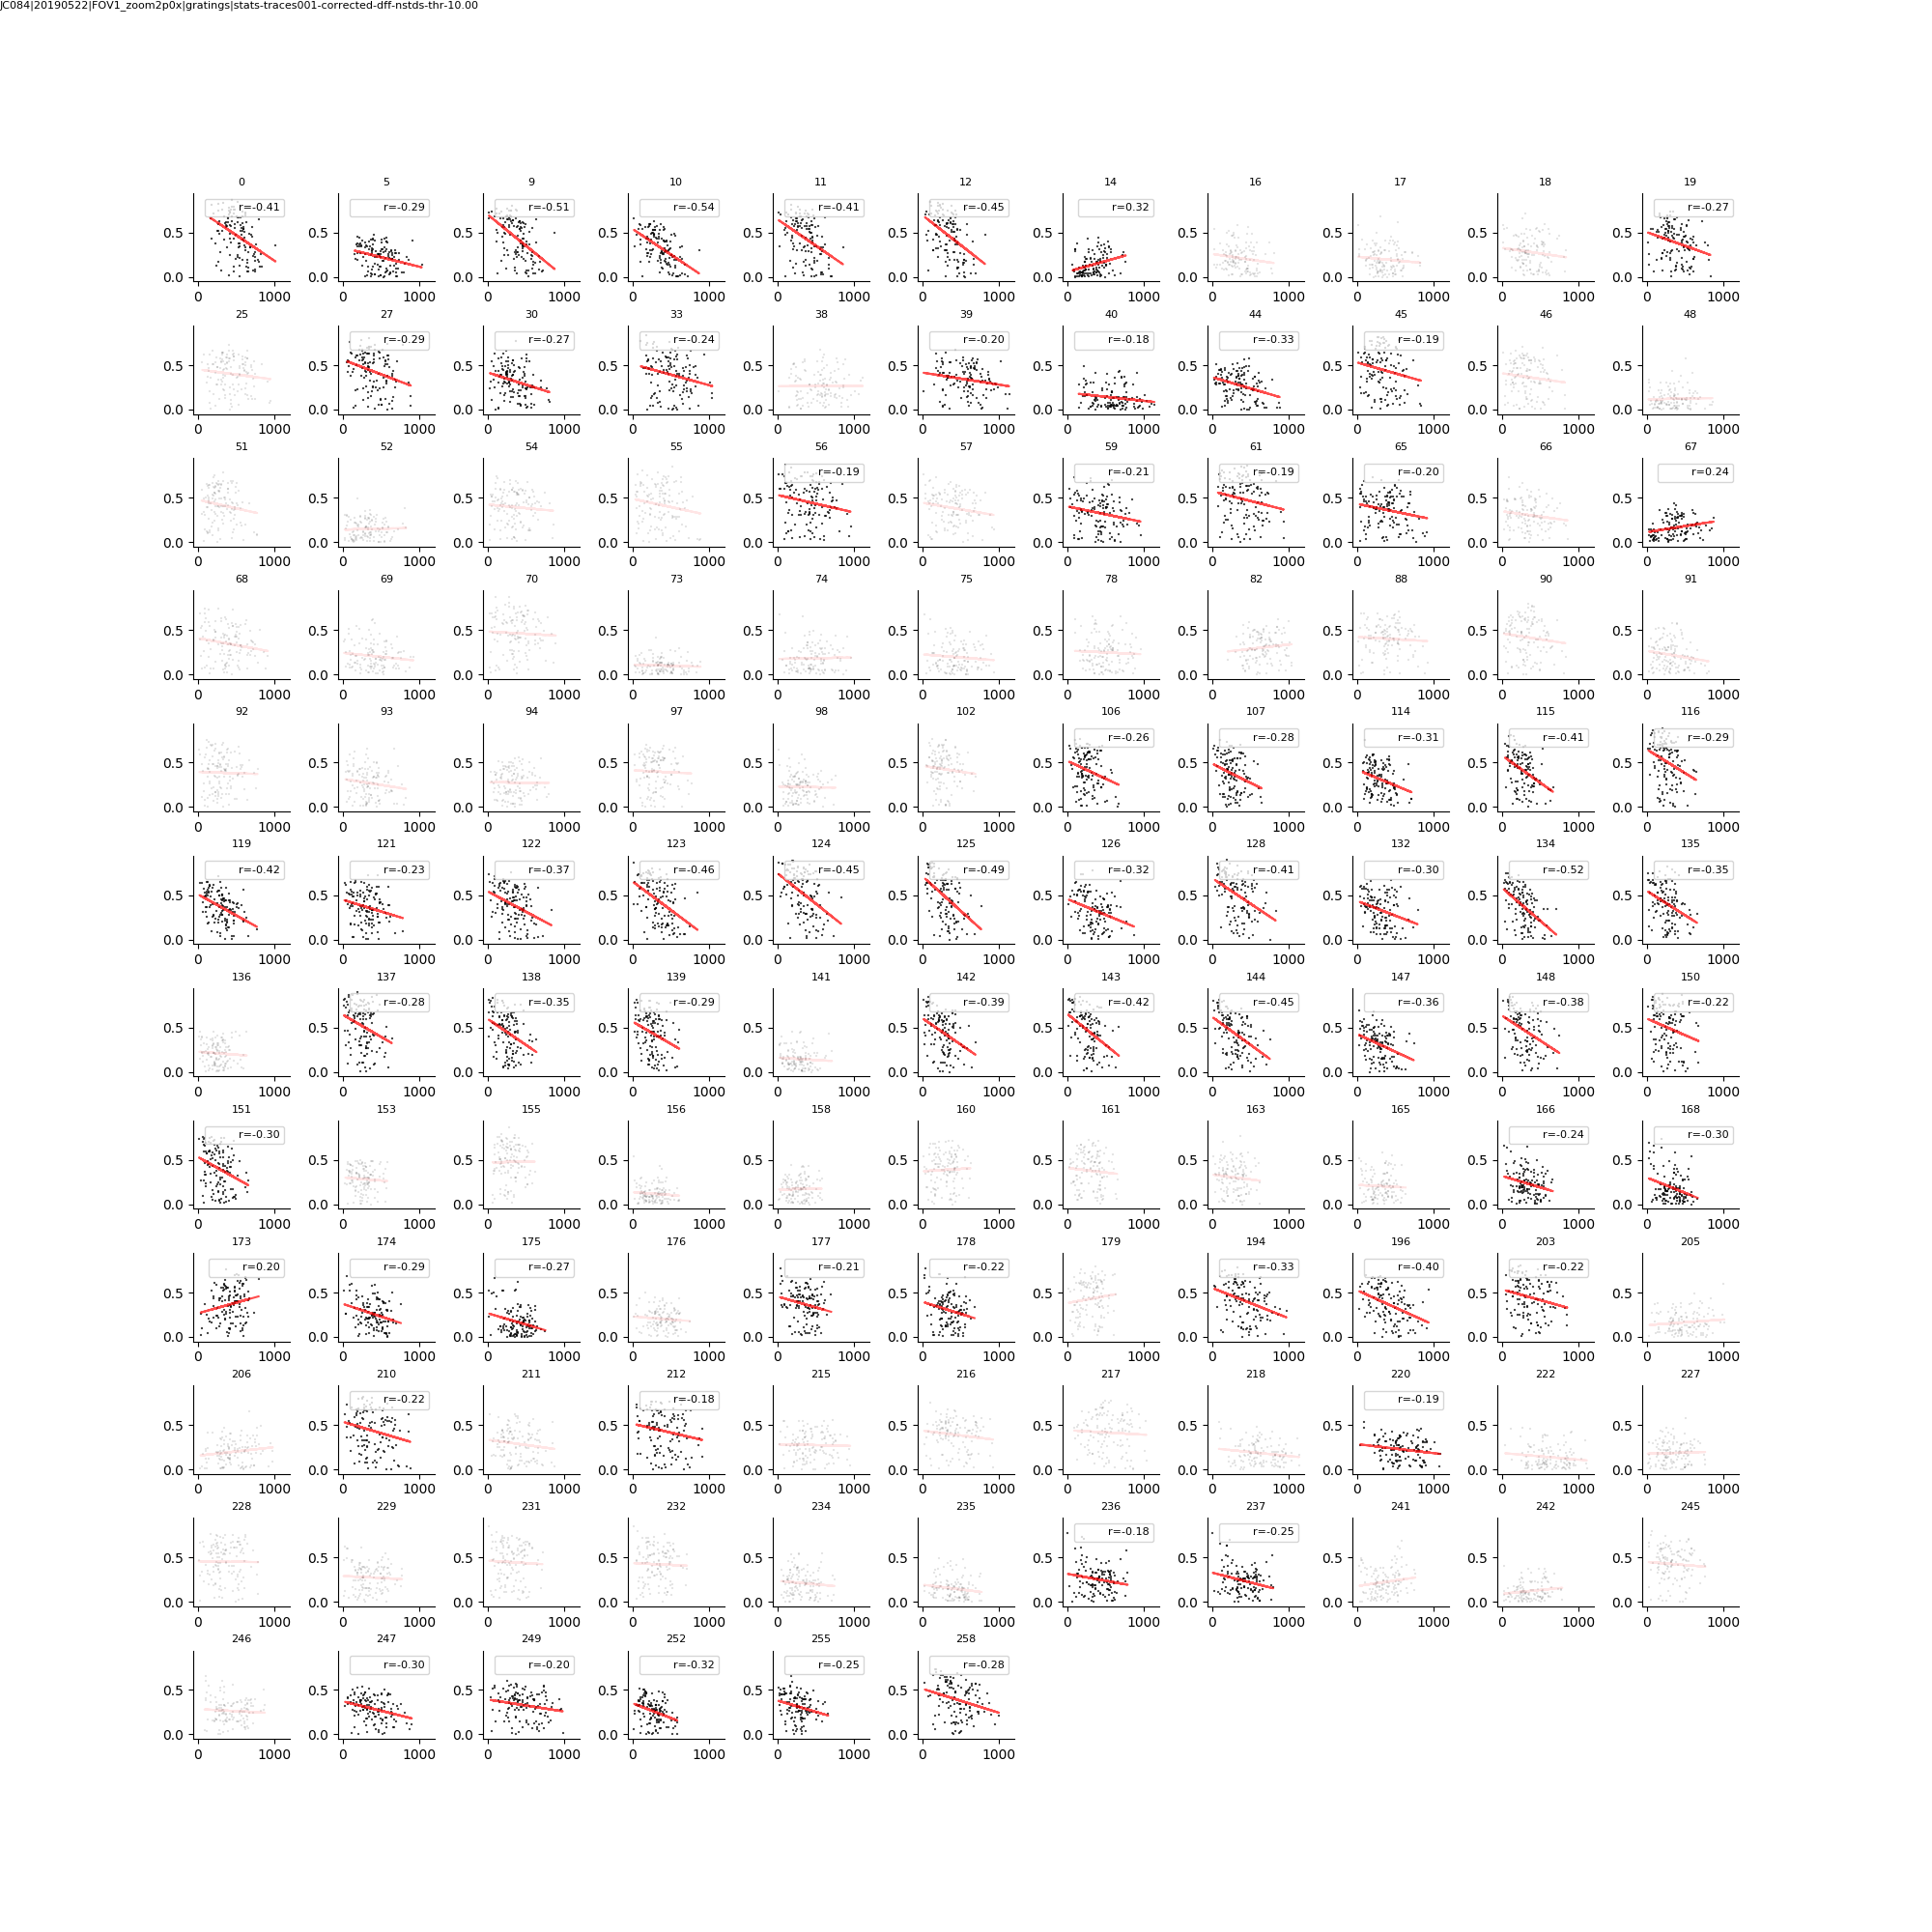

In [116]:
nplots = 30

nr = 12
nc = 11

coeffs = []
fig, axes = pl.subplots(nr, nc, sharex=True, sharey=True, figsize=(20,20))
fig.patch.set_alpha(1)
ai = 0
for roi in roi_list: #[0:nplots]:
    ax = axes.flat[ai]
#     g = ucorr.groupby(['row']).get_group(roi)
#     ixs = g.index.tolist()
#     curr_dists = pwdists[ixs]
#     curr_corrs = g['value'].values
#     print len(curr_corrs)
    currp = currpos.loc[roi]

    curr_dists = (currpos[['ap_pos', 'ml_pos']] - np.array(currp)).pow(2).sum(1).pow(0.5).values
    ixs = np.array([i for i, r in enumerate(currpos.index.tolist()) if r != roi])
    curr_dists = curr_dists[ixs]
    
    curr_corrs = np.abs(corr[roi].values)
    ixs = np.array([i for i, r in enumerate(corr[roi].index.tolist()) if r!= roi])
    curr_corrs = curr_corrs[ixs]

    fitv, regr = fit_linear_regr(curr_dists, curr_corrs, return_regr=True)
    r, p = spstats.pearsonr(curr_dists, curr_corrs)
    label = 'r=%.2f' % r
    ax.plot(0, 0, alpha=0, label=label)
    if p < 0.05:
        ax.legend(loc='upper right', fontsize=8)
        alpha=0.7
        coeffs.append(r)
    else:
        alpha=0.1
    
    ax.scatter(curr_dists, curr_corrs, marker='+', s=1, c='k', alpha=alpha)
    ax.plot(curr_dists, fitv, 'r', alpha=alpha)
    ax.set_title(roi, fontsize=8)

    sns.despine(ax=ax)
    ai += 1

pl.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9, top=0.9, bottom=0.1)
for ax in axes.flat[ai:]:
    ax.axis('off')
    
    
label_figure(fig, '|'.join([animalid, session, fov, 'gratings', stats_desc]))
pl.savefig(os.path.join(aggregate_dir, 'pw-distances_vs_cell-cell-corrs_example_stimconds.png'))

# Look at distn of corr coeffs

<IPython.core.display.Javascript object>


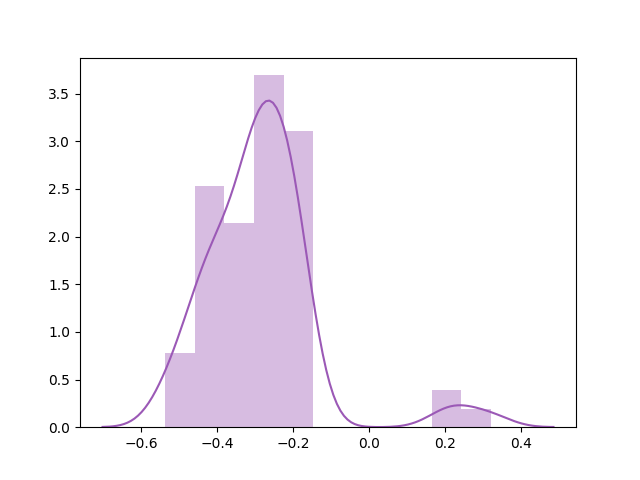

In [117]:
fig, ax = pl.subplots()
sns.distplot(coeffs, ax=ax)

<IPython.core.display.Javascript object>


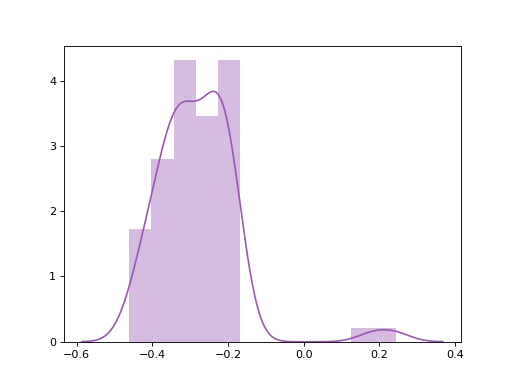

In [376]:
fig, ax = pl.subplots()
sns.distplot(coeffs, ax=ax)

In [89]:
from sklearn.linear_model import LinearRegression
import scipy.stats as spstats
import sklearn.metrics as skmetrics #import mean_squared_error

In [90]:
def fit_linear_regr(xvals, yvals, return_regr=False):
    regr = LinearRegression()
    if len(xvals.shape) == 1:
        xvals = np.array(xvals).reshape(-1, 1)
        yvals = np.array(yvals).reshape(-1, 1)
    else:
        xvals = np.array(xvals)
        yvals = np.array(yvals)
    regr.fit(xvals, yvals)
    fitv = regr.predict(xvals)
    if return_regr:
        return fitv.reshape(-1), regr
    else:
        return fitv.reshape(-1)

<IPython.core.display.Javascript object>


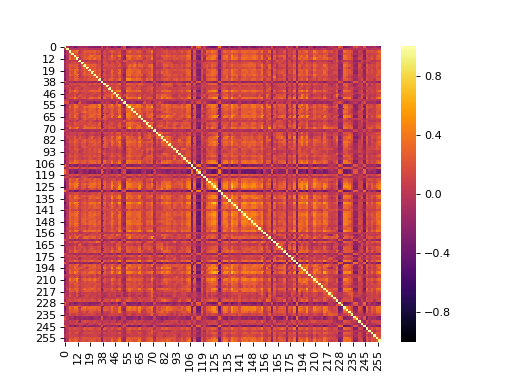

In [377]:
corr = tstats.corr(method='pearson')
pl.figure()
sns.heatmap(corr, cmap='inferno', vmin=-1, vmax=1)

<IPython.core.display.Javascript object>


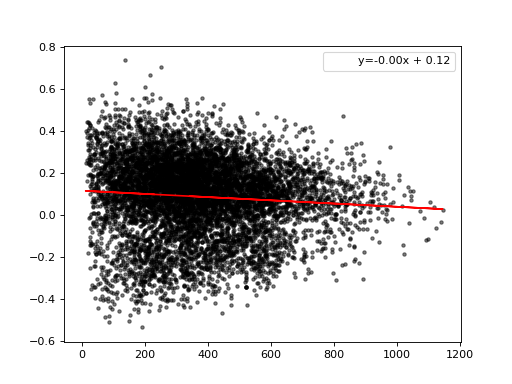

In [378]:

xv = pwdists
yv = ucorr['value']#**2. #np.abs(ucorr['value'].values)

fitv, regr = fit_linear_regr(xv, yv, return_regr=True)

fig, ax = pl.subplots() #pl.figure()
ax.scatter(xv, yv, marker='.', alpha=0.5, c='k', label=None)
ax.plot(xv, fitv, 'r')
ax.plot(0,0, alpha=0, label='y=%.2fx + %.2f' % (float(regr.coef_), float(regr.intercept_)))

ax.legend(loc='upper right')

<IPython.core.display.Javascript object>


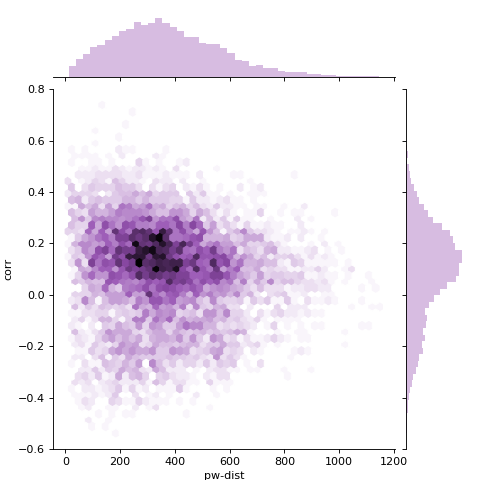

In [239]:
g = sns.jointplot(xv, yv, kind='hex')
g.set_axis_labels('pw-dist', 'corr')

In [462]:
reload(util)

<module 'pipeline.python.classifications.experiment_classes' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/experiment_classes.py'>

# Aggregate all data

In [118]:
corr_method = 'pearson'

In [119]:
corrcoef_fpath = os.path.join(aggregate_dir, 'cell-dist_v_cond-corrs_corrcoef-%s.pkl' % corr_method)

do_correlations = False
if os.path.exists(corrcoef_fpath):
    try:
        with open(corrcoef_fpath, 'rb') as f:
            df = pkl.load(f)
    except Exception as e:
        do_correlations = True
else:
    do_correlations = True

# Get all correlations between shared ROIs

In [120]:
df_list = []
for (visual_area, animalid, session, fov), g in sdata.groupby(['visual_area', 'animalid', 'session', 'fov']):
    S = util.Session(animalid, session, fov)
    roi_list = S.get_all_responsive_cells(traceid=traceid, response_type=response_type,
                                      responsive_test=responsive_test, responsive_thr=responsive_thr, fit_thr=0.5)

    
    currpos = posdf.groupby(['animalid', 'session', 'fov']).get_group((animalid, session, fov))
    currpos = currpos[currpos['index'].isin(roi_list)]
    currpos.index = currpos['index']
    _ =currpos.pop('index')
    currpos = currpos[['ap_pos', 'ml_pos']]

    for expname, exp in S.experiments.items():
        if 'retino' in expname:
            continue
        stats = exp.get_trial_metrics() #ex.get_trial_metrics()
        tstats = stats[roi_list]
    #     roi_list, nrois_total = ex.get_responsive_cells(responsive_test=responsive_test, 
    #                                                     responsive_thr=responsive_thr, 
    #                                                     n_stds=n_stds)
    #     tstats = tstats[roi_list]

        #pwdists = pdist(currpos[['ml_pos', 'ap_pos']], metric='euclidean')
        #corr = tstats.corr(method=corr_method)
        
        labels = exp.data.labels
        trial_refix = dict((trial, i) for i, trial in enumerate(sorted(labels['trial'].unique(), key=natural_keys)))
        cfgs = []
        for config, g in labels.groupby(['config']):
            trial_ixs = np.array([trial_refix[trial] for trial in sorted(g['trial'].unique(), key=natural_keys)])
            curr_trials = tstats.loc[trial_ixs]
            assert len(np.where(np.isnan(curr_trials))[0]) == 0
            cfgs.append( pd.Series(data=curr_trials.mean(axis=0), name=config) )
        configdf = pd.DataFrame(cfgs)
        corr = configdf.corr(method=corr_method)

        coeffs=[]; pvals=[];
        for roi in roi_list:

            # Get distance of each cell to current cell
            currp = currpos.loc[roi]
            curr_dists = (currpos[['ap_pos', 'ml_pos']] - np.array(currp)).pow(2).sum(1).pow(0.5).values
            ixs = np.array([i for i, r in enumerate(currpos.index.tolist()) if r != roi])
            curr_dists = curr_dists[ixs]

            # Get correlation between current cell's trial values and all other cells' trial values
            curr_corrs = np.abs(corr[roi].values)
            ixs = np.array([i for i, r in enumerate(corr[roi].index.tolist()) if r!= roi])
            curr_corrs = curr_corrs[ixs]

            #fitv, regr = fit_linear_regr(curr_dists, curr_corrs, return_regr=True)
            r, p = spstats.pearsonr(curr_dists, curr_corrs)

            coeffs.append(r)
            pvals.append(r)

        df_list.append( pd.DataFrame({'corrcoef': coeffs,
                                     'pval': pvals,
                                     'visual_area': [visual_area for _ in range(len(roi_list))],
                                     'animalid': [animalid for _ in range(len(roi_list))],
                                     'fov': [fov for _ in range(len(roi_list))],
                                      'session': [session for _ in range(len(roi_list))],
                                      'experiment': [expname for _ in range(len(roi_list))]},
                                    index=roi_list) )


df = pd.concat(df_list, axis=0).reset_index()
df['cell'] = df.pop('index')
print df.shape

with open(corrcoef_fpath, 'wb') as f:
    pkl.dump(df, f, protocol=pkl.HIGHEST_PROTOCOL)
    
    

[JC076] 20190422 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
traces001
... [JC076|20190422|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
--> [retino] not implemented
... loading data array
... offset: 581.51
[JC076] 20190502 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
traces001
... [JC076|20190502|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
... [JC076|20190502|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits

... getting data paths - name: rfs10
... renaming experiment to run name: combined_rfs10_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC099|20190612|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... getting responsive cells (test: nstds, thr: 10.00')
traces001
... [JC099|20190612|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
--> [retino] not implemented
... loading data array
... offset: 603.70
... loading data array
... offset: 552.08
... adjusting for equal reps / condn...
... loading data array
... offset: 572.09
[JC099] 20190617 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
... [JC099|20190617|FOV1_zoom2p0x] creating rfs10 obj

... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
--> [retino] not implemented
... loading data array
... offset: 564.02
... loading data array
... offset: 608.06
... loading data array
... offset: 573.12
[JC083] 20190508 - FOV1_zoom2p0x:  Getting anatomicals...
No anatomicals for current session: (JC083 | 20190508 | FOV1_zoom2p0x)
... Getting screen info
traces001
... [JC083|20190508|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
--> [retino] not implemented
... [JC083|20190508|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... loading data array

... loading data array
... offset: 310.52
[JC083] 20190511 - FOV1_zoom2p0x:  Getting anatomicals...
No anatomicals for current session: (JC083 | 20190511 | FOV1_zoom2p0x)
... Getting screen info
... [JC083|20190511|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
... renaming experiment to run name: combined_rfs_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC083|20190511|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... getting responsive cells (test: nstds, thr: 10.00')
traces001
... [JC083|20190511|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
--> [retino] not implemented
... loading data array
... offset: 312.11
... adjusting for equal reps / condn...
..

# Get correlations between active cells

In [158]:
corrcoef_fpath = os.path.join(aggregate_dir, 'cell-dist_v_cond-corrs_corrcoef-%s_active-cells.pkl' % corr_method)


<IPython.core.display.Javascript object>


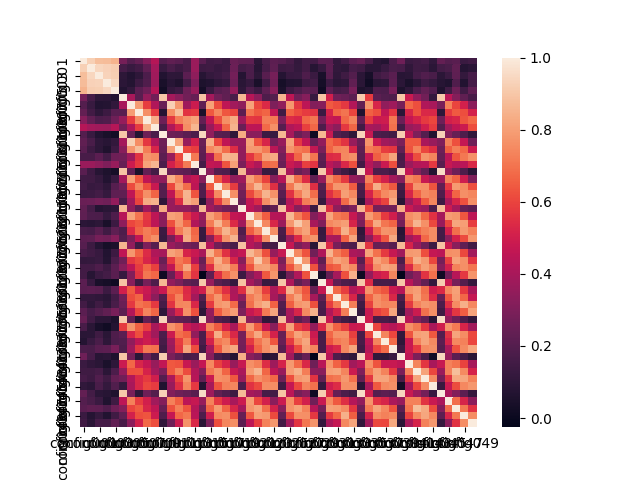

In [202]:
pl.figure()
sns.heatmap(configdf.T.corr())

In [161]:
configdfs = {}
df_list = []
for (visual_area, animalid, session, fov), g in sdata.groupby(['visual_area', 'animalid', 'session', 'fov']):
    if visual_area not in configdfs.keys():
        configdfs[visual_area] = {}
    S = util.Session(animalid, session, fov)
    all_cells = S.get_all_responsive_cells(traceid=traceid, response_type=response_type,
                                      responsive_test=responsive_test, responsive_thr=responsive_thr, fit_thr=0.5)
    for expname, exp in S.experiments.items():
        if 'retino' in expname:
            continue
        if expname not in configdfs[visual_area].keys():
            configdfs[visual_area][expname] = {}
            
        stats = exp.get_trial_metrics() #ex.get_trial_metrics()
        roi_list, nrois_total = exp.get_responsive_cells(responsive_test=responsive_test, 
                                                        responsive_thr=responsive_thr, 
                                                        n_stds=n_stds)
        tstats = stats[roi_list]

        #pwdists = pdist(currpos[['ml_pos', 'ap_pos']], metric='euclidean')
        #corr = tstats.corr(method=corr_method)

        currpos = posdf.groupby(['animalid', 'session', 'fov']).get_group((animalid, session, fov))
        currpos = currpos[currpos['index'].isin(roi_list)]
        currpos.index = currpos['index']
        _ =currpos.pop('index')
        currpos = currpos[['ap_pos', 'ml_pos']]

        labels = exp.data.labels
        trial_refix = dict((trial, i) for i, trial in enumerate(sorted(labels['trial'].unique(), key=natural_keys)))
        cfgs = []
        for config, g in labels.groupby(['config']):
            trial_ixs = np.array([trial_refix[trial] for trial in sorted(g['trial'].unique(), key=natural_keys)])
            curr_trials = tstats.loc[trial_ixs]
            assert len(np.where(np.isnan(curr_trials))[0]) == 0
            cfgs.append( pd.Series(data=curr_trials.mean(axis=0), name=config) )
        configdf = pd.DataFrame(cfgs)
        corr = configdf.corr(method=corr_method)
        
        configdfs[visual_area][expname].update({(animalid, session, fov): configdf})

        coeffs=[]; pvals=[];
        for roi in roi_list:

            # Get distance of each cell to current cell
            currp = currpos.loc[roi]
            curr_dists = (currpos[['ap_pos', 'ml_pos']] - np.array(currp)).pow(2).sum(1).pow(0.5).values
            ixs = np.array([i for i, r in enumerate(currpos.index.tolist()) if r != roi])
            curr_dists = curr_dists[ixs]

            # Get correlation between current cell's trial values and all other cells' trial values
            curr_corrs = np.abs(corr[roi].values)
            ixs = np.array([i for i, r in enumerate(corr[roi].index.tolist()) if r!= roi])
            curr_corrs = curr_corrs[ixs]

            #fitv, regr = fit_linear_regr(curr_dists, curr_corrs, return_regr=True)
            r, p = spstats.pearsonr(curr_dists, curr_corrs)

            coeffs.append(r)
            pvals.append(r)

        df_list.append( pd.DataFrame({'corrcoef': coeffs,
                                     'pval': pvals,
                                     'visual_area': [visual_area for _ in range(len(roi_list))],
                                     'animalid': [animalid for _ in range(len(roi_list))],
                                     'fov': [fov for _ in range(len(roi_list))],
                                      'session': [session for _ in range(len(roi_list))],
                                      'experiment': [expname for _ in range(len(roi_list))]},
                                    index=roi_list) )


df = pd.concat(df_list, axis=0).reset_index()
df['cell'] = df.pop('index')
print df.shape

with open(corrcoef_fpath, 'wb') as f:
    pkl.dump(df, f, protocol=pkl.HIGHEST_PROTOCOL)
    
    

[JC076] 20190422 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
traces001
... [JC076|20190422|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
--> [retino] not implemented
... loading data array
... offset: 581.51
... getting responsive cells (test: nstds, thr: 10.00')
[JC076] 20190502 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
traces001
... [JC076|20190502|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
... [JC076|20190502|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff


... offset: 251.04
... adjusting for equal reps / condn...
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... loading data array
... offset: 248.61
... getting responsive cells (test: nstds, thr: 10.00')
[JC099] 20190609 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
... [JC099|20190609|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
... renaming experiment to run name: combined_rfs10_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC099|20190609|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... getting responsive cells (test: nstds, thr: 10.00')
traces001
... [JC099|20190609|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: comb

... adjusting for equal reps / condn...
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... loading data array
... offset: 329.04
... getting responsive cells (test: nstds, thr: 10.00')
[JC078] 20190513 - FOV1_zoom2p0x:  Getting anatomicals...
No anatomicals for current session: (JC078 | 20190513 | FOV1_zoom2p0x)
... Getting screen info
... [JC078|20190513|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
... renaming experiment to run name: combined_rfs_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC078|20190513|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... getting responsive cells (test: nstds, thr: 10.00')
traces001
... [JC078|20190513|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment 

... renaming experiment to run name: combined_gratings_static
... getting responsive cells (test: nstds, thr: 10.00')
traces001
... [JC084|20190525|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
--> [retino] not implemented
... loading data array
... offset: 304.36
... adjusting for equal reps / condn...
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... loading data array
... offset: 306.53
... getting responsive cells (test: nstds, thr: 10.00')
... loading data array
... offset: 289.08
... getting responsive cells (test: nstds, thr: 10.00')
[JC091] 20190627 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
... [JC091|20190627|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
... renaming experiment to run name: combined_r

... getting data paths - name: rfs
... renaming experiment to run name: combined_rfs_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC085|20190622|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
... renaming experiment to run name: combined_rfs10_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC085|20190622|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... getting responsive cells (test: nstds, thr: 10.00')
traces001
... [JC085|20190622|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
--> [retino] not implemented
... loading data array
... offset: 353.84
... adjusting for equal reps / 

In [163]:
corrcoef_fpath

'/n/coxfs01/julianarhee/aggregate-visual-areas/cell-dist_v_cond-corrs_corrcoef-pearson_active-cells.pkl'

In [203]:
configdfs = {}
for (visual_area, animalid, session, fov), g in sdata.groupby(['visual_area', 'animalid', 'session', 'fov']):
    if visual_area not in configdfs.keys():
        configdfs[visual_area] = {}
    S = util.Session(animalid, session, fov)
    all_cells = S.get_all_responsive_cells(traceid=traceid, response_type=response_type,
                                      responsive_test=responsive_test, responsive_thr=responsive_thr, fit_thr=0.5)
    for expname, exp in S.experiments.items():
        if 'retino' in expname:
            continue
        if expname not in configdfs[visual_area].keys():
            configdfs[visual_area][expname] = {}
            
        stats = exp.get_trial_metrics() #ex.get_trial_metrics()
        roi_list, nrois_total = exp.get_responsive_cells(responsive_test=responsive_test, 
                                                        responsive_thr=responsive_thr, 
                                                        n_stds=n_stds)
        tstats = stats[roi_list]

        labels = exp.data.labels
        trial_refix = dict((trial, i) for i, trial in enumerate(sorted(labels['trial'].unique(), key=natural_keys)))
        cfgs = []
        for config, g in labels.groupby(['config']):
            trial_ixs = np.array([trial_refix[trial] for trial in sorted(g['trial'].unique(), key=natural_keys)])
            curr_trials = tstats.loc[trial_ixs]
            assert len(np.where(np.isnan(curr_trials))[0]) == 0
            cfgs.append( pd.Series(data=curr_trials.mean(axis=0), name=config) )
        configdf = pd.DataFrame(cfgs)
        
        configdfs[visual_area][expname].update({(animalid, session, fov): configdf})


[JC076] 20190422 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
traces001
... [JC076|20190422|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
--> [retino] not implemented
... loading data array
... offset: 581.51
... getting responsive cells (test: nstds, thr: 10.00')
[JC076] 20190502 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
traces001
... [JC076|20190502|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
... [JC076|20190502|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff


... offset: 251.04
... adjusting for equal reps / condn...
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... loading data array
... offset: 248.61
... getting responsive cells (test: nstds, thr: 10.00')
[JC099] 20190609 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
... [JC099|20190609|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
... renaming experiment to run name: combined_rfs10_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC099|20190609|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... getting responsive cells (test: nstds, thr: 10.00')
traces001
... [JC099|20190609|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: comb

... adjusting for equal reps / condn...
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... loading data array
... offset: 329.04
... getting responsive cells (test: nstds, thr: 10.00')
[JC078] 20190513 - FOV1_zoom2p0x:  Getting anatomicals...
No anatomicals for current session: (JC078 | 20190513 | FOV1_zoom2p0x)
... Getting screen info
... [JC078|20190513|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
... renaming experiment to run name: combined_rfs_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC078|20190513|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... getting responsive cells (test: nstds, thr: 10.00')
traces001
... [JC078|20190513|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment 

... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... getting responsive cells (test: nstds, thr: 10.00')
traces001
... [JC084|20190525|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
--> [retino] not implemented
... loading data array
... offset: 304.36
... adjusting for equal reps / condn...
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... loading data array
... offset: 306.53
... getting responsive cells (test: nstds, thr: 10.00')
... loading data array
... offset: 289.08
... getting responsive cells (test: nstds, thr: 10.00')
[JC091] 20190627 - FOV1_zoom2p0x:  Getting anatomicals...
... Found 1 anatomical runs.
... Getting screen info
... [JC091|20190627|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
... ren

... Getting screen info
... [JC085|20190622|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
... renaming experiment to run name: combined_rfs_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC085|20190622|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
... renaming experiment to run name: combined_rfs10_static
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC085|20190622|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... getting responsive cells (test: nstds, thr: 10.00')
traces001
... [JC085|20190622|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... getting responsive cells (test: nstds, thr: 10.00')
--> [retino] not implem

In [204]:
df_fpath = os.path.join(aggregate_dir, 'avg-conds-by-area-by-exp_active-cells.pkl')
with open(df_fpath, 'rb') as f:
    pkl.dump(configdfs, f, protocol=pkl.HIGHEST_PROTOCOL)

IOError: [Errno 2] No such file or directory: '/n/coxfs01/julianarhee/aggregate-visual-areas/avg-conds-by-area-by-exp_active-cells.pkl'

In [215]:
exp = util.ReceptiveFields('rfs', animalid, session, fov, traceid=traceid)


... [JC097|20190617|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
... renaming experiment to run name: combined_rfs_static


In [216]:
stats = exp.get_trial_metrics() #ex.get_trial_metrics()


... loading data array
... offset: 593.08
... adjusting for equal reps / condn...


# Get all trial data for active cells

In [223]:
visual_areas = ['V1', 'Lm', 'Li']
BLOBS=dict((v, dict()) for v in visual_areas)
RFS=dict((v, dict()) for v in visual_areas)
GRATS=dict((v, dict()) for v in visual_areas)

for visual_area in ['V1', 'Lm', 'Li']:
    dsets = sdata[sdata['visual_area']==visual_area]
    
    for (animalid, session, fov, experiment), g in dsets.groupby(['animalid', 'session', 'fov', 'experiment']):
        if 'rfs' in experiment:
            exp = util.ReceptiveFields(experiment, animalid, session, fov, traceid=traceid)
        elif 'gratings' in experiment:
            exp = util.Gratings(animalid, session, fov, traceid=traceid)
        elif 'blobs' in experiment:
            exp = util.Objects(animalid, session, fov, traceid=traceid)
        else:
            continue
            
        stats = exp.get_trial_metrics() #ex.get_trial_metrics()
        roi_list, nrois_total = exp.get_responsive_cells(responsive_test=responsive_test, 
                                                        responsive_thr=responsive_thr, 
                                                        n_stds=n_stds)
        stats = stats[roi_list]
        labels = exp.data.labels

        configs = []
        trials = []
        for (trial, config), g in labels.groupby(['trial', 'config']):
            configs.append(config)
            trials.append(trial)
        stats['trial'] = trials
        stats['config'] = configs
        
        skey = '-'.join([animalid, session, fov])
        
        if 'rfs' in experiment:
            RFS[visual_area].update({skey: stats})
        elif 'gratings' in experiment:
            GRATS[visual_area].update({skey: stats})
        elif 'blobs' in experiment:
            BLOBS[visual_area].update({skey: stats})

        

        

... [JC076|20190420|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
... offset: 253.29
... getting responsive cells (test: nstds, thr: 10.00')
... [JC076|20190420|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... loading data array
... offset: 251.51
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC076|20190501|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
... offset: 285.69
... getting responsive cells (test: nstds, thr: 10.00')
... [JC076|20190501|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... loading data array
.

... offset: 617.18
... adjusting for equal reps / condn...
... getting responsive cells (test: nstds, thr: 10.00')
... [JC097|20190617|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... loading data array
... offset: 608.50
... getting responsive cells (test: nstds, thr: 10.00')
... [JC097|20190617|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
... renaming experiment to run name: combined_rfs_static
... loading data array
... offset: 593.08
... adjusting for equal reps / condn...
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC076|20190423|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... loading data array
... offset: 426.50
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-typ

... offset: 492.88
... adjusting for equal reps / condn...
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC084|20190525|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
... offset: 289.08
... getting responsive cells (test: nstds, thr: 10.00')
... [JC084|20190525|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... loading data array
... offset: 306.53
... getting responsive cells (test: nstds, thr: 10.00')
... [JC084|20190525|FOV1_zoom2p0x] creating rfs object
... getting data paths - name: rfs
... renaming experiment to run name: combined_rfs_static
... loading data array
... offset: 304.36
... adjusting for equal reps / condn...
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
.

... offset: 430.09
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC099|20190612|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
... loading data array
... offset: 572.09
... getting responsive cells (test: nstds, thr: 10.00')
... [JC099|20190612|FOV1_zoom2p0x] creating gratings object
... getting data paths - name: gratings
... renaming experiment to run name: combined_gratings_static
... loading data array
... offset: 603.70
... getting responsive cells (test: nstds, thr: 10.00')
... [JC099|20190612|FOV1_zoom2p0x] creating rfs10 object
... getting data paths - name: rfs10
... renaming experiment to run name: combined_rfs10_static
... loading data array
... offset: 552.08
... adjusting for equal reps / condn...
... checking for RF fits: fit-2dgaus_dff-no-cutoff
... loading RF fits (response-type: dff)
... got rf fits
... [JC099|20190617

In [224]:
datastat_dir = os.path.join(aggregate_dir, 'data-stats', stats_desc)
if not os.path.exists(datastat_dir):
    os.makedirs(datastat_dir)
    
print datastat_dir

/n/coxfs01/julianarhee/aggregate-visual-areas/data-stats/stats-traces001-corrected-dff-nstds-thr-10.00


In [226]:
with open(os.path.join(datastat_dir, 'gratings.pkl'), 'wb') as f:
    pkl.dump(GRATS, f, protocol=pkl.HIGHEST_PROTOCOL)
    
with open(os.path.join(datastat_dir, 'blobs.pkl'), 'wb') as f:
    pkl.dump(BLOBS, f, protocol=pkl.HIGHEST_PROTOCOL)
    
with open(os.path.join(datastat_dir, 'rfs.pkl'), 'wb') as f:
    pkl.dump(RFS, f, protocol=pkl.HIGHEST_PROTOCOL)

# PLOT

In [165]:
visual_areas = ['V1', 'Lm', 'Li']
colors = ['k', 'royalblue', 'darkorange'] #sns.color_palette(palette='colorblind') #, n_colors=3)
area_colors = {'V1': colors[0], 'Lm': colors[1], 'Li': colors[2]}

In [166]:
for experiment, tmpd in df.groupby(['experiment']):
    if experiment == 'dynblobs':
        continue
    print experiment

blobs
gratings
rfs
rfs10


In [184]:
data_identifier = '|'.join([fov_type, traceid, stats_desc])
print data_identifier

zoom2p0x|traces001|stats-traces001-corrected-dff-nstds-thr-10.00


In [185]:
g.head()

,animalid,corrcoef,experiment,fov,pval,session,visual_area,cell
8077,JC085,-0.262273,rfs10,FOV1_zoom2p0x,-0.262273,20190622,V1,0
8078,JC085,-0.284464,rfs10,FOV1_zoom2p0x,-0.284464,20190622,V1,5
8079,JC085,-0.534577,rfs10,FOV1_zoom2p0x,-0.534577,20190622,V1,7
8080,JC085,-0.392075,rfs10,FOV1_zoom2p0x,-0.392075,20190622,V1,11
8081,JC085,-0.443868,rfs10,FOV1_zoom2p0x,-0.443868,20190622,V1,19


In [188]:
g.groupby(['animalid', 'session', 'fov'])['cell'].count().values

array([104, 105, 132, 117, 119])

<IPython.core.display.Javascript object>


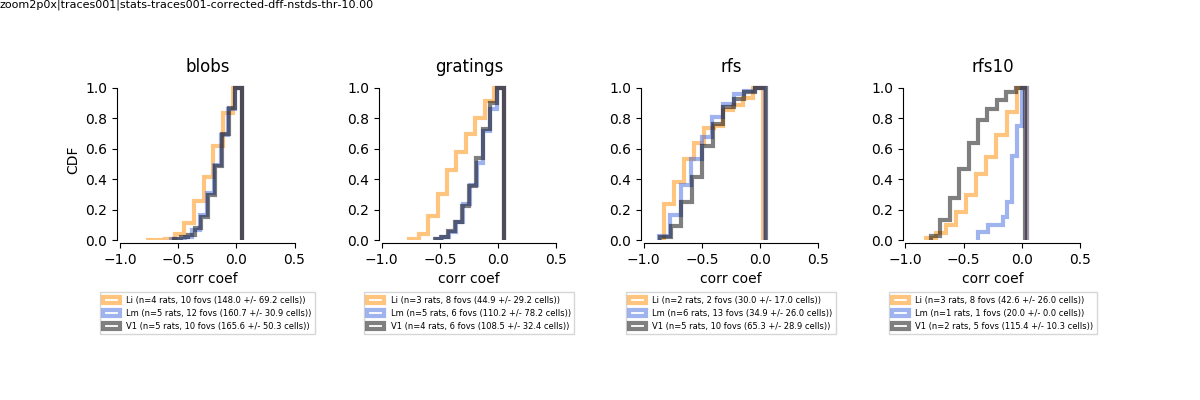

In [198]:
cdf = True
fig, axes = pl.subplots(1,4, figsize=(12,4), sharex=True, sharey=True) #, 3, figsize=(12,4), sharex=True, sharey=True)
fig.patch.set_alpha(1)

ai = 0
for experiment, tmpd in df.groupby(['experiment']):
    if experiment == 'dynblobs':
        continue
    
    ax = axes[ai]
    for (visual_area), g in tmpd.groupby(['visual_area']):
        g = g[g['pval'] < 0.05]
        if len(g) == 0:
            continue
        values = g['corrcoef'].values
        weights = np.ones_like(values)/float(len(values))
        nrats = len(g['animalid'].unique())
        ncells_per_fov = g.groupby(['animalid', 'session', 'fov'])['cell'].count().values
        nfovs = len(ncells_per_fov)
        ncells_mean = np.mean(ncells_per_fov)
        ncells_std = np.std(ncells_per_fov)
        
        label = '%s (n=%i rats, %i fovs (%.1f +/- %.1f cells))' % (visual_area, nrats, nfovs, ncells_mean, ncells_std)
        ax.set_xlim([-1, 0.5])
        ax.hist(values, 
                cumulative=cdf,
                label=label,
                color=area_colors[visual_area],
                histtype='step', alpha=0.5, lw=3,
                normed=0, weights=weights)

        #ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8)

        # Shrink current axis's height by 10% on the bottom
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                         box.width, box.height * 0.9])

        # Put a legend below current axis
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
                  fancybox=False, shadow=False, ncol=1, fontsize=6)

    ax.set_title(experiment)
    ai += 1
    
for ai, ax in enumerate(axes):
    sns.despine(ax=ax, trim=True, offset=2)
    ax.set_xlabel('corr coef')
    if ai == 0:
        if cdf:
            ax.set_ylabel('CDF')
        else:
            ax.set_ylabel('fraction')

pl.subplots_adjust(right=0.9, left=0.1, wspace=.5, bottom=0.4, top=0.8)
label_figure(fig, data_identifier)

pl.savefig(os.path.join(aggregate_dir, 'pearsons-corr_cell-corr-across-stimcond_vs_cell-distance_by-experiment.png'))

<IPython.core.display.Javascript object>


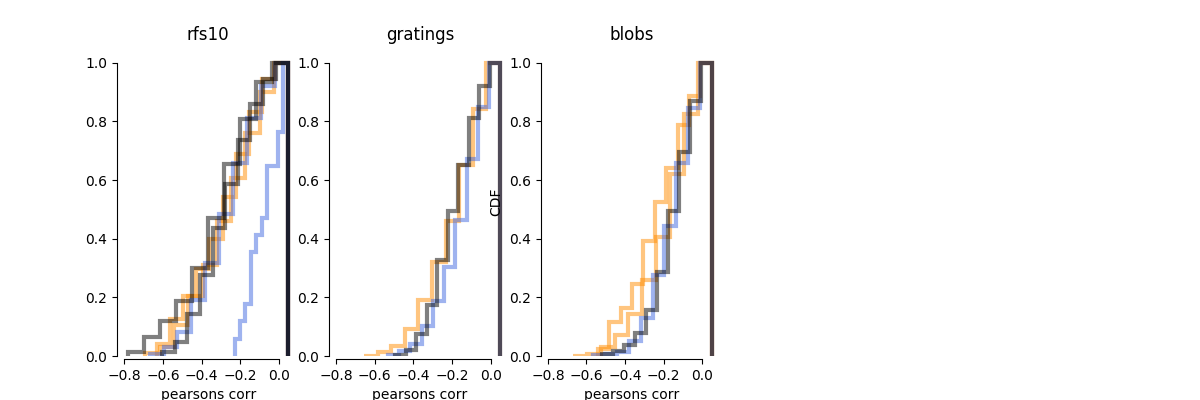

In [128]:
cdf = True
fig, axes = pl.subplots(1, 3, figsize=(12,4), sharex=True, sharey=True)

for (visual_area, experiment), tmpd in df.groupby(['visual_area', 'experiment']):
    g = tmpd[tmpd['pval'] < 0.05]

    if 'rfs' in experiment:
        if 'rfs' in tmpd.groupby(['experiment']).groups.keys() and 'rfs10' in tmpd.groupby(['experiment']).groups.keys():
            if experiment == 'rfs':
                continue
            else:
                ax = axes[0]
        else:
            ax = axes[0]
    elif experiment == 'gratings':
        ax = axes[1]
    elif experiment == 'blobs':
        ax = axes[2]

    values = g['corrcoef'].values
    weights = np.ones_like(values)/float(len(values))

    nfovs = len(g.groupby(['animalid', 'session', 'fov']).groups)
    if i==0:
        label = '%s (n=%i rats, %i fovs)' % (visual_area, nrats, nfovs)
    else:
        label = None
    ax.hist(values, 
            cumulative=cdf,
            label=label,
            color=area_colors[visual_area],
            histtype='step', alpha=0.5, lw=3,
            normed=0, weights=weights)

    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8)
    ax.set_title(experiment)

        
for ax in axes:
    sns.despine(ax=ax, trim=True, offset=2)
    ax.set_xlabel('pearsons corr')
if cdf:
    ax.set_ylabel('CDF')
else:
    ax.set_ylabel('fraction')
    
pl.subplots_adjust(right=0.6, left=0.1, wspace=0.2)



<IPython.core.display.Javascript object>


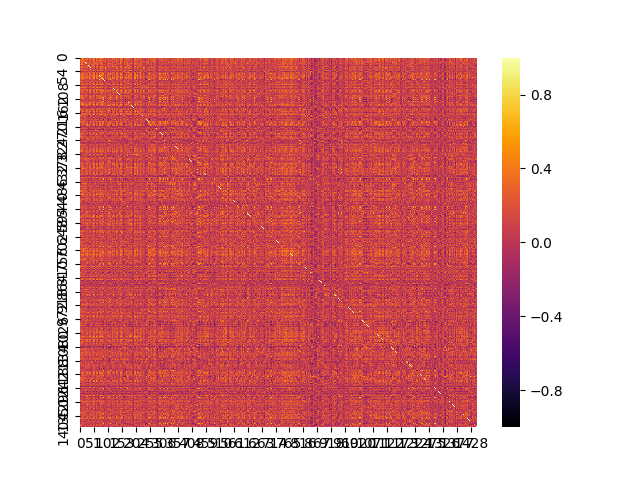

In [122]:
corr_trials = tstats.T.corr()
pl.figure()
sns.heatmap(corr_trials, cmap='inferno', vmin=-1, vmax=1)

<IPython.core.display.Javascript object>


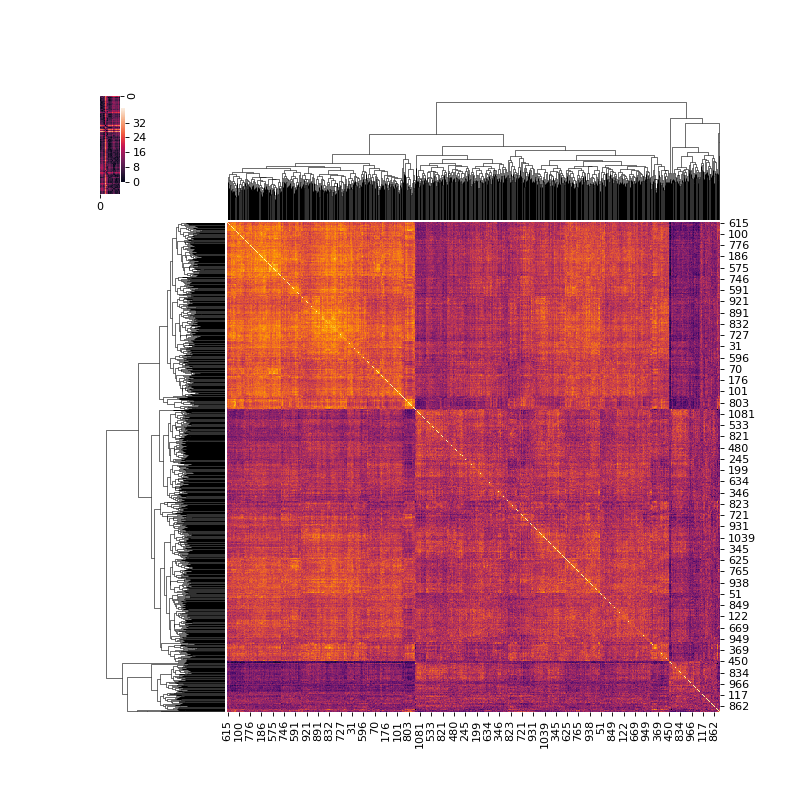

In [45]:
sns.clustermap(corr_trials, cmap='inferno', z_score=None)